## Required Modules Installation

Make sure to install the following modules before running the project:
```bash
!pip install basemap


# Load dataset from local .csv

In [46]:
import pandas as pd

df = pd.read_csv('Dataset Gempa Bumi (in).csv', sep=';')

In [47]:
df

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,01/11/2008,21:02:43,-918,11906,10,49,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,01/11/2008,20:58:50,-655,12964,10,46,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,01/11/2008,17:43:13,-701,10663,121,37,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,01/11/2008,16:24:15,-330,12785,10,32,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,01/11/2008,16:20:37,-641,12954,70,43,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92882,26/01/2023,02:25:09,324,12718,10,40,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92883,26/01/2023,02:15:04,270,12710,10,39,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92884,26/01/2023,01:57:09,-783,12107,10,38,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
92885,26/01/2023,01:46:21,300,12716,10,41,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.dtypes

tgl         object
ot          object
lat          int64
lon          int64
depth        int64
mag          int64
remark      object
strike1    float64
dip1       float64
rake1      float64
strike2    float64
dip2       float64
rake2      float64
dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  int64  
 3   lon      92887 non-null  int64  
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  int64  
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.2+ MB


## Conver Lat and Long

In [ ]:
latitude = df['lat'] / 100
longitude = df['lon'] / 100

## Peta sebaran gempar di sekitar Indonesia beserta kedalaman gempa dan magnitude

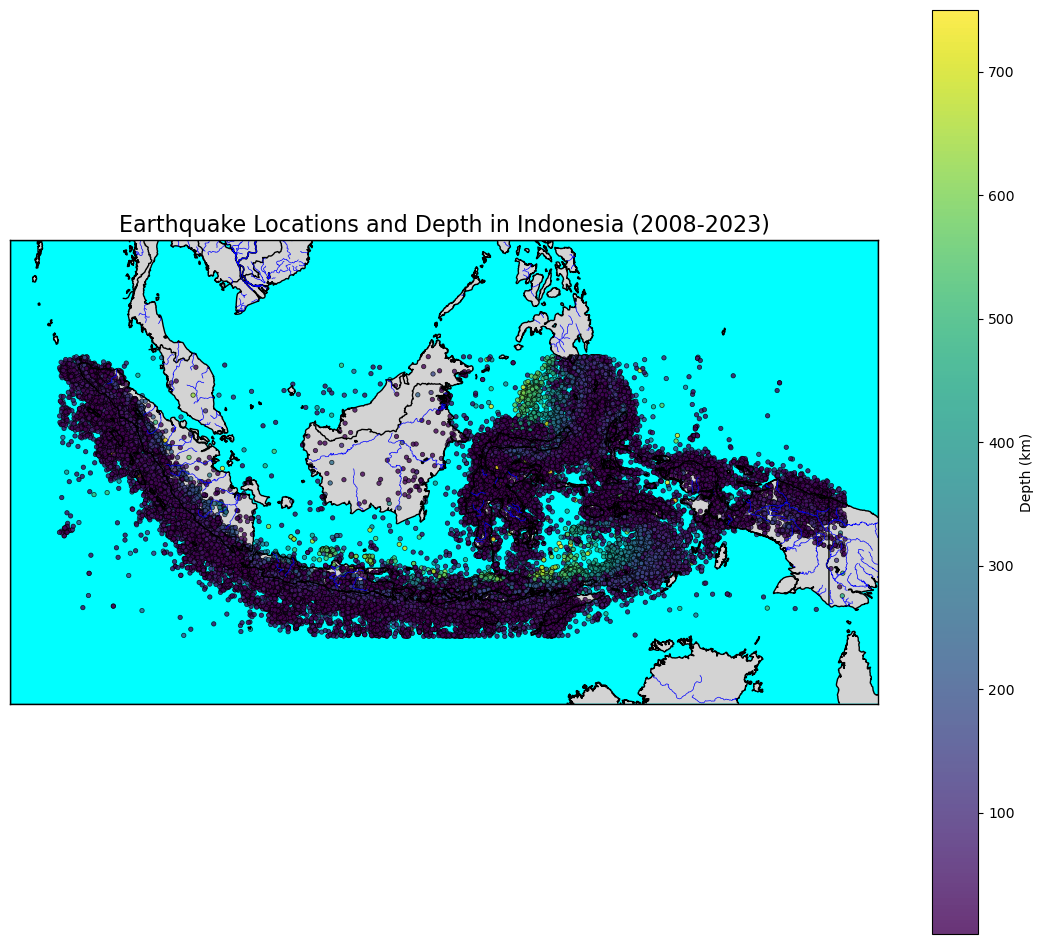

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(14, 12))


m = Basemap(projection='merc', 
            llcrnrlat=-15, urcrnrlat=13,   # Latitude range: more accurately covering Indonesia
            llcrnrlon=91, urcrnrlon=144,   # Longitude range: more accurately covering Indonesia
            resolution='i')  

m.drawcoastlines(linewidth=1.0)
m.drawcountries(linewidth=1.0)
m.drawrivers(linewidth=0.5, color='blue')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')


x, y = m(longitude.values, latitude.values)


sc = m.scatter(x, y, c=df['depth'], cmap='viridis', marker='o', s=10, alpha=0.8, edgecolors="k", linewidth=0.5)
plt.colorbar(sc, label='Depth (km)')


plt.title('Earthquake Locations and Depth in Indonesia (2008-2023)', fontsize=16)

# Show the plot
plt.show()


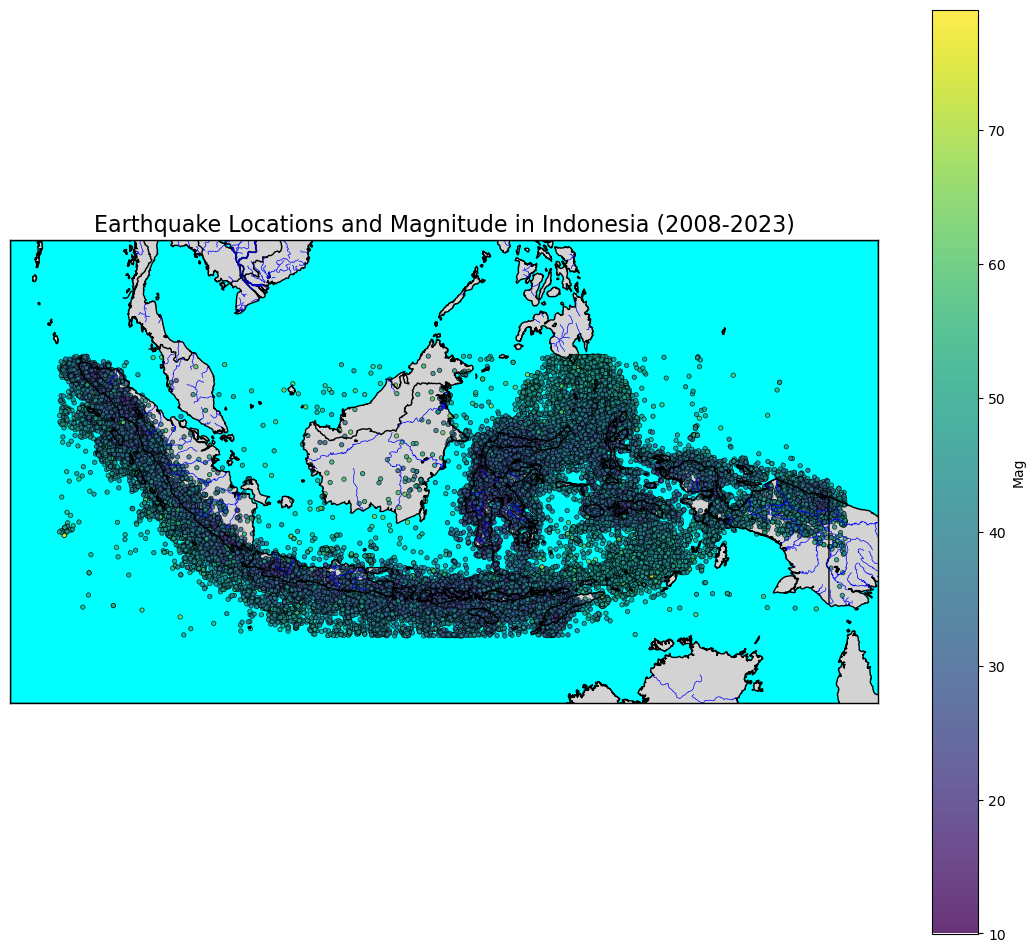

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(14, 12))


m = Basemap(projection='merc', 
            llcrnrlat=-15, urcrnrlat=13,   # Latitude range: more accurately covering Indonesia
            llcrnrlon=91, urcrnrlon=144,   # Longitude range: more accurately covering Indonesia
            resolution='i')  

m.drawcoastlines(linewidth=1.0)
m.drawcountries(linewidth=1.0)
m.drawrivers(linewidth=0.5, color='blue')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')


x, y = m(longitude.values, latitude.values)


sc = m.scatter(x, y, c=df['mag'], cmap='viridis', marker='o', s=10, alpha=0.8, edgecolors="k", linewidth=0.5)
plt.colorbar(sc, label='Mag')


plt.title('Earthquake Locations and Magnitude in Indonesia (2008-2023)', fontsize=16)

# Show the plot
plt.show()


## Frekuensi gempa di Indonesia dan sekitar berdasarkan Lokasi

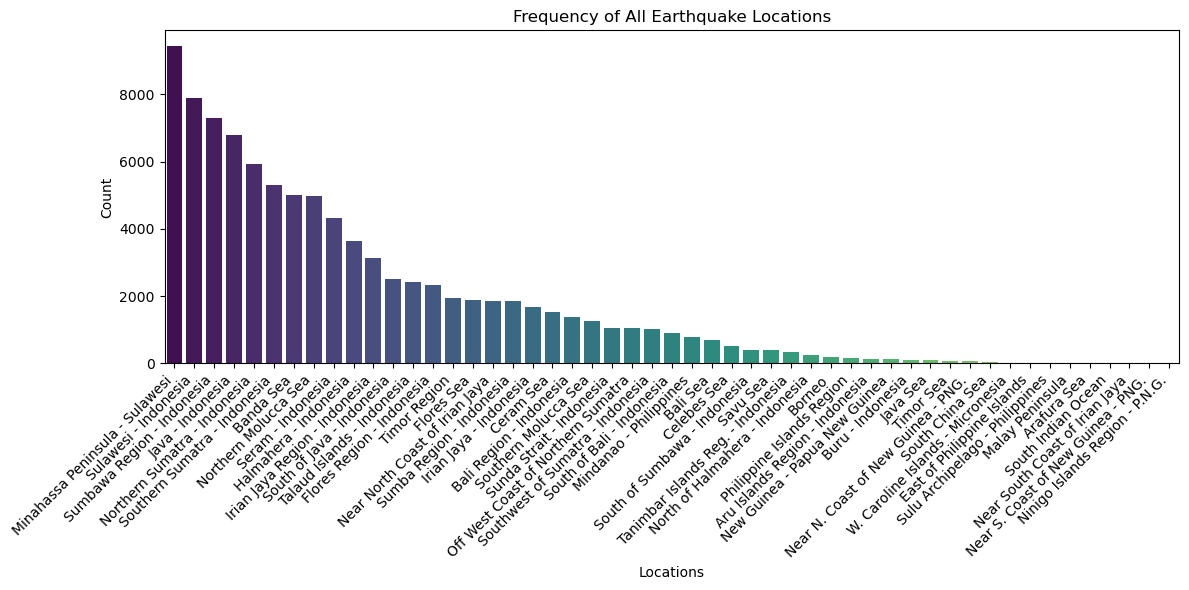

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

remark_counts = df['remark'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=remark_counts.index, y=remark_counts.values, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Locations')
plt.ylabel('Count')
plt.title('Frequency of All Earthquake Locations')

plt.tight_layout()
plt.show()

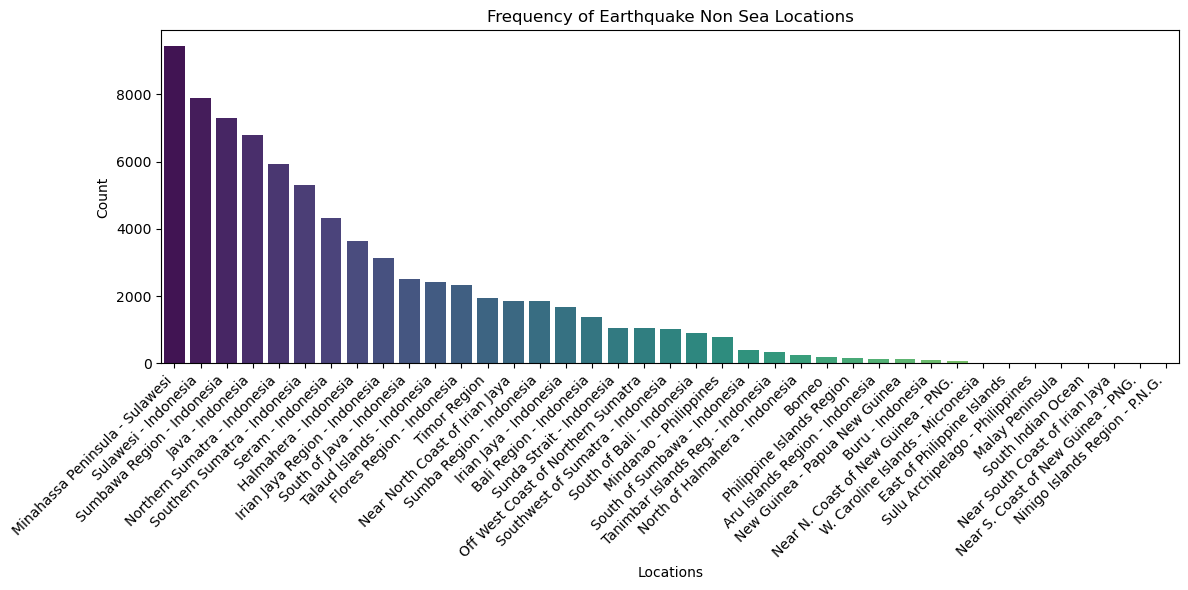

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_filtered = df[~df['remark'].str.contains('sea', case=False, na=False)]

remark_counts = df_filtered['remark'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=remark_counts.index, y=remark_counts.values, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Locations')
plt.ylabel('Count')
plt.title('Frequency of Earthquake Non Sea Locations')

plt.tight_layout()
plt.show()


## Distribusi gempa berdasarkan kedalaman dan magnitude

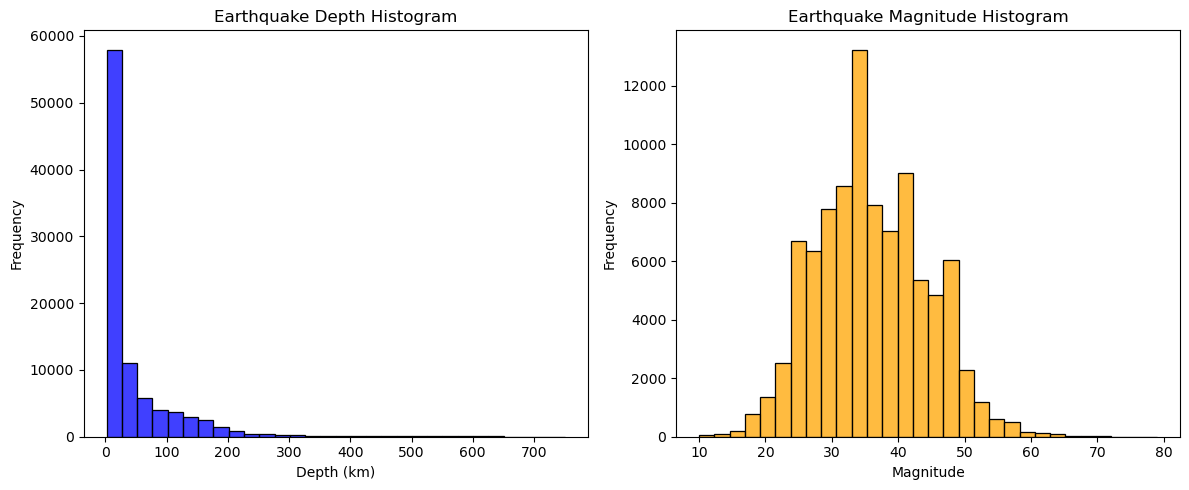

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['depth'], bins=30,  color='blue')
plt.title('Earthquake Depth Histogram')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(df['mag'], bins=30, color='orange')
plt.title('Earthquake Magnitude Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


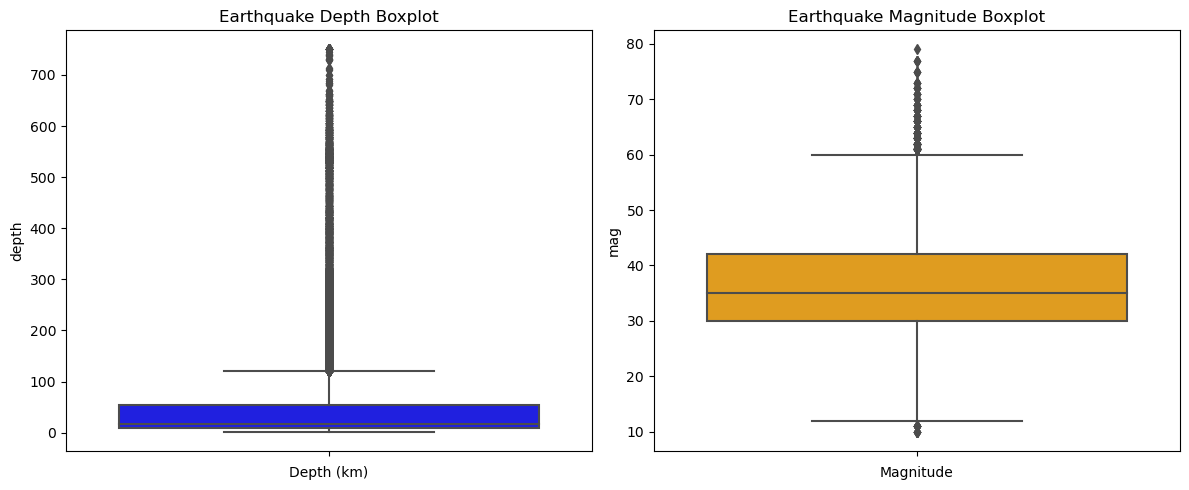

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['depth'], color='blue')
plt.title('Earthquake Depth Boxplot')
plt.xlabel('Depth (km)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['mag'], color='orange')
plt.title('Earthquake Magnitude Boxplot')
plt.xlabel('Magnitude')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

df['Brand'] = df['Brand'].astype(str)

# Perform OneHotEncoding on 'Brand'
brand_encoder = OneHotEncoder(drop='first', sparse=False)
brand_encoded = brand_encoder.fit_transform(df[['Brand']])
brand_columns = brand_encoder.get_feature_names_out(['Brand'])
df_encoded = pd.DataFrame(brand_encoded, columns=brand_columns, index=df.index)

# Concatenate encoded brand back into original DataFrame
df = pd.concat([df, df_encoded], axis=1)

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples

# Concatenate encoded brand back into original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Prepare the data by dropping non-numeric or unnecessary columns
X = df.drop(['Product ID', 'Product Name', 'Brand'], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Convert to pandas DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

# Elbow method to find the optimal number of clusters
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss[i] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel("Number of Clusters 'k'")
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('The Elbow Method')
plt.show()

# Define the number of clusters from the elbow method
n_clusters = 4  # Adjust based on your observation from the elbow plot

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

# Add clusters to the data
df['Cluster'] = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Add principal components to DataFrame
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plot the clusters and centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=100)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Silhouette plot
fig, ax = plt.subplots(figsize=(10, 8))
silhouette_values = silhouette_samples(scaled_features, kmeans.labels_)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

KeyboardInterrupt: 